### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python


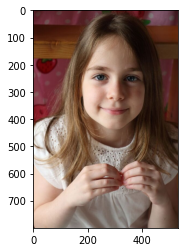

True

In [ ]:
##다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2

filepath='/content/drive/MyDrive/딥러닝/opencv/facedata/girl.png'
img = cv2.imread(filepath)
#plt.axis('off')  #axis 출력 끄기
#OpenCV BGR(파녹빨)인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   #이미지 출력

plt.show()

#이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/딥러닝/opencv/facedata/girl1.png', img)

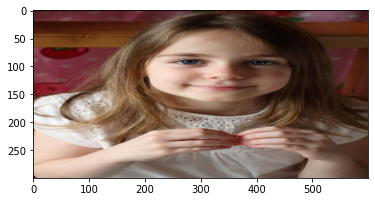

In [ ]:
import matplotlib.pyplot as plt
import cv2

#이미지 읽어 들이기
filepath = '/content/drive/MyDrive/딥러닝/opencv/facedata/girl1.png'
img = cv2.imread(filepath)
print(img.shape)
#plt.axis('off')
#이미지 크기 변경하기#작은 사이즈로 변경할 경우 모자이크 처리돼서 출력된다.
im2 = cv2.resize(img, (600,300))  #img, (width, height)
#크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/딥러닝/opencv/facedata/girl1_out_resize.png', im2)

#이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

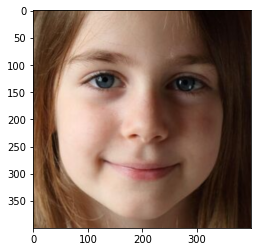

In [ ]:
import matplotlib.pyplot as plt
import cv2

#이미지 읽어 들이기
filepath = '/content/drive/MyDrive/딥러닝/opencv/facedata/girl1.png'
img = cv2.imread(filepath)
#plt.axis('off')
#이미지 자르기
im3 = img[150:450, 150:450]    #y1:y2, x1:x2
#이미지 크기 변경하기
im3 = cv2.resize(im3, (400,400))
#크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/딥러닝/opencv/facedata/girl1_cut_resize.png', im3)

#이미지 출력하기
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()

### 물체 검출

#### 얼굴 검출 
- 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집


[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]\
https://github.com/opencv/opencv/tree/master/data/haarcascades


얼굴의 좌표 =  149 127 316 316


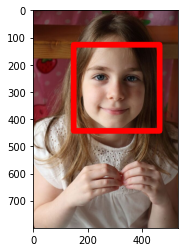

In [ ]:
# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = '/content/drive/MyDrive/딥러닝/opencv/facedata/haarcascade_frontalface_alt.xml'  #정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file)  #검출기는 캐스케이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기->컴퓨터는 그레이스케일로 변환(명암으로)해서 더 잘 인식한다.
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/딥러닝/opencv/facedata/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 인식하기(cascade.detectMultiScale() 메서드를 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))  #그레이스케일 이미지 데이터, 얼굴 인식 영역의 최소 크기 지정
#결과 확인하기
if len(face_list) == 0:    #검출 결과를 확인 후 리스트가 비어 있으면 메시지 출력 후 종료
  print("얼굴 인식 실패")
  quit()
#인식한 부분 표시하기#검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
  print("얼굴의 좌표 = ", x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=20)

#이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/딥러닝/opencv/facedata/face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#mosaic.py
import cv2

def mosaic(img, rect, size):
  #모자이크 적용할 부분 추출하기
  (x1,y1,x2,y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]
  #축소하고 확대하기
  i_small = cv2.resize(i_rect, (size,size))
  i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)  #보간법
  #모자이크 적용하기
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

In [ ]:
#모듈 업로드
!cp /content/drive/MyDrive/딥러닝/opencv/facedata/mosaic.py /content

In [ ]:
!ls

drive  mosaic.py  sample_data


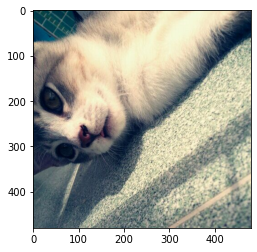

In [ ]:
img = cv2.imread("/content/drive/MyDrive/딥러닝/opencv/facedata/cat.png")
#이미지 출력하기
#cv2.imwrite("/content/drive/MyDrive/딥러닝/opencv/facedata/cat.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

##### 모자이크 처리

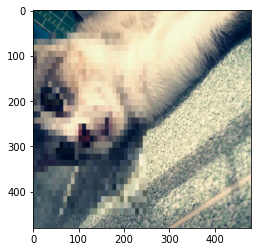

In [ ]:
#import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

#이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("/content/drive/MyDrive/딥러닝/opencv/facedata/cat.png")
mos = mosaic(img, (0,50, 250,450), 30)

#이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/딥러닝/opencv/facedata/cat_mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

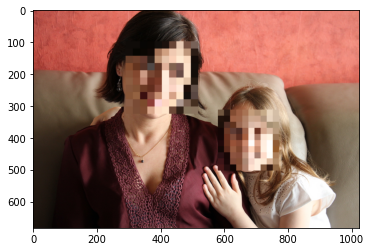

In [ ]:
#사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

#캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = '/content/drive/MyDrive/딥러닝/opencv/facedata/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

#이미지를 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread('/content/drive/MyDrive/딥러닝/opencv/facedata/family.jpg')
#img = cv2.imread("myphoto.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

#인식한 부분 모자이크 처리하기
for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y, x+w,y+h), 10)

#이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/딥러닝/opencv/facedata/family_mosaic.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

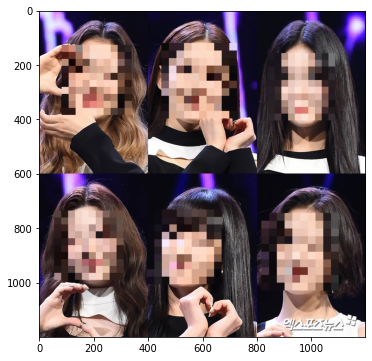

In [ ]:
#사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

cascade_file = '/content/drive/MyDrive/딥러닝/opencv/facedata/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("/content/drive/MyDrive/딥러닝/opencv/facedata/stayc.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

for (x,y,w,h) in face_list:
  img = mosaic(img, (x,y, x+w,y+h), 10)

cv2.imwrite("/content/drive/MyDrive/딥러닝/opencv/facedata/stayc_mosaic.jpg", img)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

---0---
얼굴의 좌표 = 135 109 352 352
---10---
얼굴의 좌표 = 174 149 350 350
---20---
얼굴의 좌표 = 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


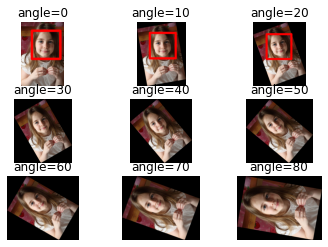

In [ ]:
#openCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

#검출기 생성하고 이미지 읽어 들이기
cascade_file = "/content/drive/MyDrive/딥러닝/opencv/facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("/content/drive/MyDrive/딥러닝/opencv/facedata/girl.png")

#얼굴 검출하고 영역 표시하기
def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
  #인식한 부분 표시하기
  for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=30)

#여러 각도의 이미지를 만들고 테스트하기
for i in range(0,9):
  ang = i*10
  print("---" + str(ang) + "---")
  img_r = ndimage.rotate(img,ang)
  face_detect(img_r)
  plt.subplot(3, 3, i+1)
  plt.axis('off')
  plt.title("angle=" + str(ang))
  plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()

OpenCV를 활용한 영상 처리
- OpenCV의 VideoCapture 클래스
  - 동영상을 개별 Frame으로 하나씩 읽어들이는 기능 제공
  - 생성 인자로 입력 video 파일 위치를 받아 생성
    - cap=cv2.VideoCapture(video_input_path)
  - 입력 video 파일의 다양한 속성 가져오기 가능
    - 영상 Frame 너비
      cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    - 영상 Frame 높이
      cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    - 영상 FPS(Frame Per Second)
      cap.get(cv2.CAP_PROP_FPS)
  - read()는 마지막 Frame까지 차례로 Frame을 읽음
- VideoWriter
  - VideoCapture로 읽어들인 개별 Frame을 동영상 파일로 Write 수행
  - write할 동영상 파일 위치, Encoding 코덱 유형, write fps 수치, frame 크기를 생성자로 입력 받음
  - 이들 값에 따른 동영상 write 수행
  - write 시, 특정 포맷으로 동영상 Encoding 가능
    - DIVX, XVID, MJPG, X264, WMV1, WMV2
